# Creating a Basic Neural Network Model using Pytorch - 1

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [23]:
#Create a Model Class that inherits nn.Modules
class Model(nn.Module):
    # Input layer (4 features of the flower) -->
    # Hidden layer 1 (number of neurones) -->
    # H2 (n) -->
    # output (3 classes of iris flowers)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__() #instantiate our nn.Module
        self.fc1 = nn.Linear(in_features, h1) #layer 1
        self.fc2 = nn.Linear(h1,h2) # layer 2
        self.out = nn.Linear(h2,out_features) # output layer
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [24]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

# Load Data and Train Neural Network Model - 2

In [25]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [26]:
my_df = pd.read_csv("iris.data")

In [27]:
my_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']
my_df

,sepal_length,sepal_width,petal_length,petal_width,variety
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
my_df.variety.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:
# Change last column to integer so the model can understand the class
my_df['variety'] = my_df['variety'].replace('Iris-setosa', 0)
my_df['variety'] = my_df['variety'].replace('Iris-versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Iris-virginica', 2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_36956\2760847642.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Iris-virginica', 2)


In [30]:
my_df.variety.unique()

array([0, 1, 2], dtype=int64)

In [31]:
X = my_df.drop(['variety'], axis=1)
y = my_df['variety']

In [32]:
#Convert these to numpy arrays
X = X.values
y = y.values

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [35]:
# Convert X Features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [36]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [37]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iteration (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # The lower your learning rate the longer the model takes to train

In [38]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [39]:
# train our model
#Epochs? (one run thru all the training data in our network)
epochs = 200
losses = []
for i in range(epochs):
    # Go forward to get a prediction
    y_pred = model.forward(X_train) # Get predicted results

    # Measure the loss/error, gonna be high at first
    loss = criterion(y_pred,y_train) # Preicted values vs y_train

    # Keep track of our losses
    losses.append(loss.detach().numpy())

    # print every 10 epoch
    if i % 10 == 0:
        print(f'Epochs: {i} and loss: {loss}')

    # Do some back propagation: take the error rate of forward propagation and feed it back
    # thru the network to fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epochs: 0 and loss: 1.1254802942276
Epochs: 10 and loss: 1.0196183919906616
Epochs: 20 and loss: 0.8324087858200073
Epochs: 30 and loss: 0.5955133438110352
Epochs: 40 and loss: 0.4056708812713623
Epochs: 50 and loss: 0.27592799067497253
Epochs: 60 and loss: 0.18675486743450165
Epochs: 70 and loss: 0.12966136634349823
Epochs: 80 and loss: 0.09302735328674316
Epochs: 90 and loss: 0.07107434421777725
Epochs: 100 and loss: 0.057579055428504944
Epochs: 110 and loss: 0.04889124631881714
Epochs: 120 and loss: 0.042899809777736664
Epochs: 130 and loss: 0.03849733993411064
Epochs: 140 and loss: 0.03506268560886383
Epochs: 150 and loss: 0.03207792341709137
Epochs: 160 and loss: 0.0287015363574028
Epochs: 170 and loss: 0.025052959099411964
Epochs: 180 and loss: 0.021712876856327057
Epochs: 190 and loss: 0.018746912479400635


Text(0.5, 0, 'Epochs')

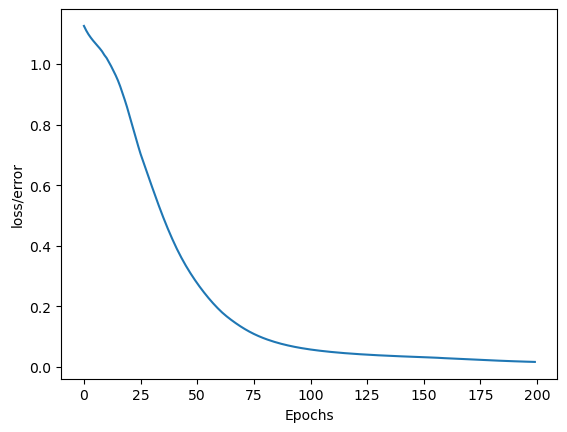

In [40]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epochs")

In [ ]:
# Evaluate the Model on test data set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
    y_eval = model.forward(X_test)